# Covid-19 Data Analysis Project using Python

## The Covid-19 Data Analysis Project using Python involves collecting
## and analyzing real-time data on Covid-19 cases, recoveries, and
## fatalities from various sources.

## It utilizes libraries like Pandas, NumPy, and Matplotlib for data
## manipulation, cleaning, and visualization.
## The project aims to identify patterns, trends, and correlations in the
## data, such as the impact of vaccination rates or lockdown measures
## on the spread of the virus.

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data
# Example dataset - replace 'covid_data.csv' with your actual data source
data =pd.read_csv("Downloads/country_wise_latest.csv")



## Display basic info about the dataset

In [65]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

## Drop rows with any missing values
## Data Cleaning


In [69]:
data.dropna(inplace=True)
data

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,new_cases
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,0.0
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,11.0
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,499.0
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,-606.0
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean,141.0
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa,-152.0
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean,10.0
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa,61.0


## Top 10 Countries with Highest New Cases


C:\Users\BvumaBK\AppData\Local\Temp\ipykernel_11164\2992822676.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='New cases', y='Country/Region', palette='coolwarm')


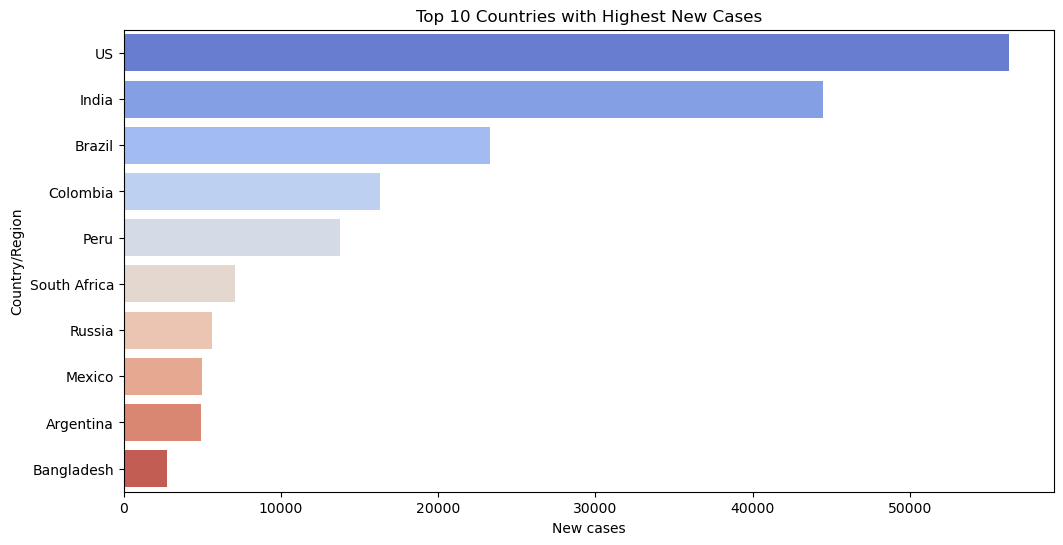

In [97]:
top_countries = data.nlargest(10, 'New cases')[['Country/Region', 'New cases']]
plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='New cases', y='Country/Region', palette='coolwarm')
plt.title('Top 10 Countries with Highest New Cases')
plt.xlabel('New cases')
plt.ylabel('Country/Region')
plt.show()


## Total Confirmed Cases and Deaths by WHO Region


C:\Users\BvumaBK\AppData\Local\Temp\ipykernel_11164\897796256.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_summary, x='Confirmed', y='WHO Region', palette='viridis')


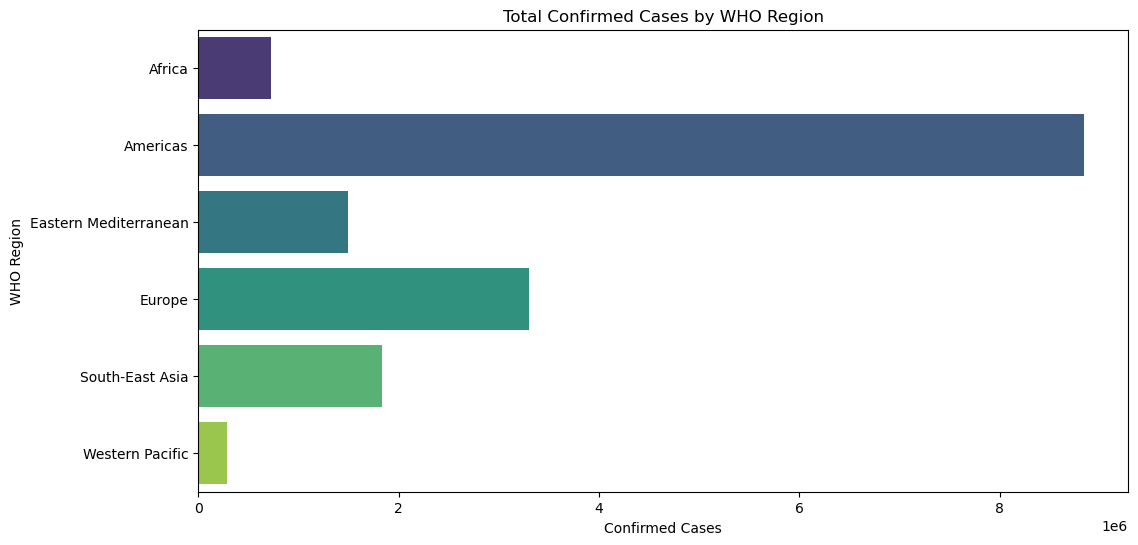

In [99]:
plt.figure(figsize=(12, 6))
region_summary = data.groupby('WHO Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
sns.barplot(data=region_summary, x='Confirmed', y='WHO Region', palette='viridis')
plt.title('Total Confirmed Cases by WHO Region')
plt.xlabel('Confirmed Cases')
plt.ylabel('WHO Region')
plt.show()

## Creating a correlation matrix for numerical columns


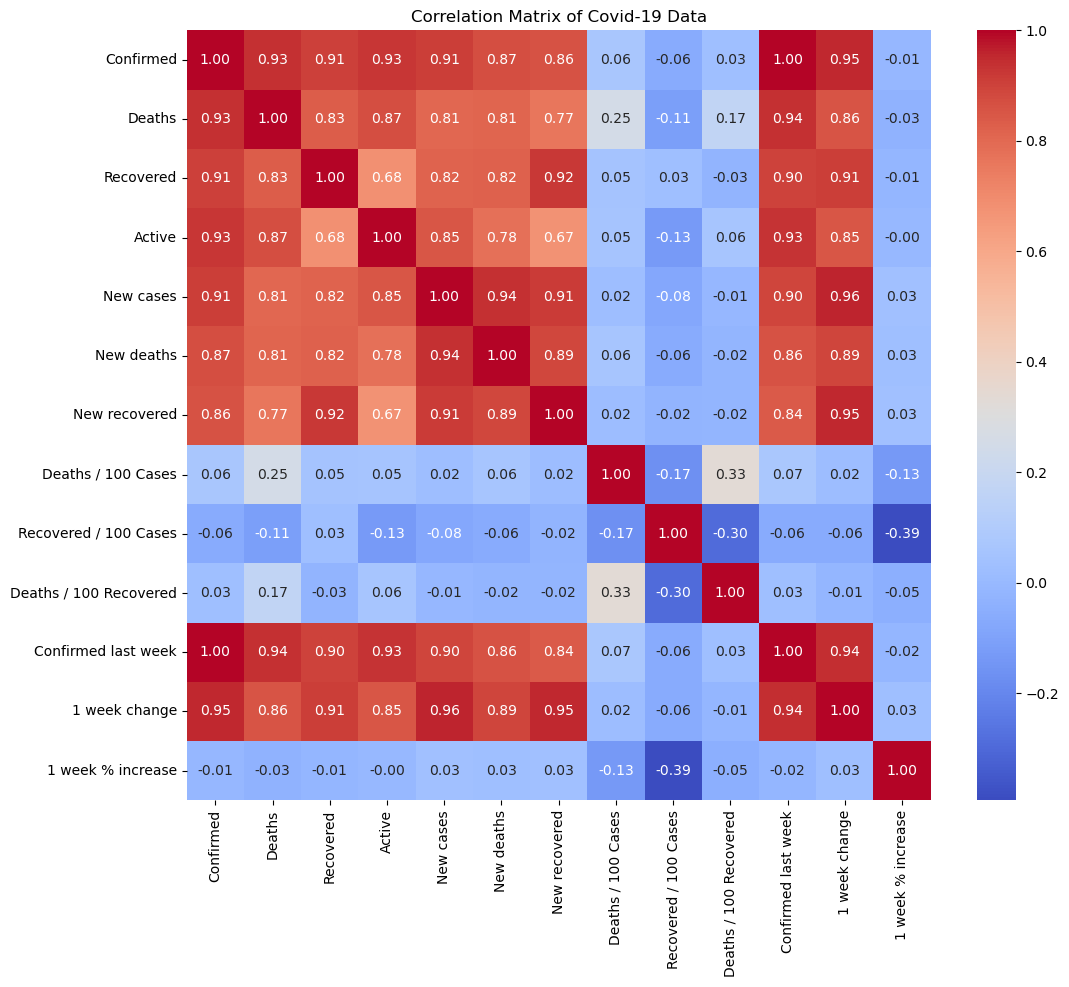

In [105]:
numerical_cols = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 
                  'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 
                  'Confirmed last week', '1 week change', '1 week % increase']
correlation_matrix = data[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Covid-19 Data')
plt.show()

## Data Exploration and Visualization
## Plot active cases, recoveries, and confirmed over time

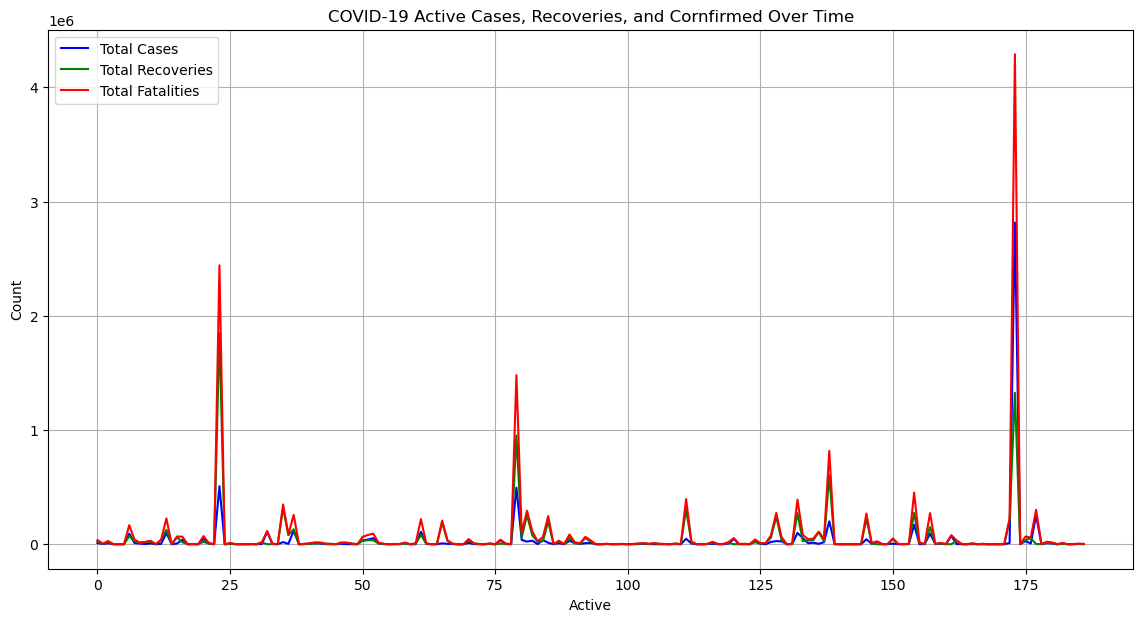

In [113]:

plt.figure(figsize=(14, 7))
plt.plot( data['Active'], label='Total Cases', color='blue')
plt.plot(data['Recovered'], label='Total Recoveries', color='green')
plt.plot(data['Confirmed'], label='Total Fatalities', color='red')
plt.xlabel('Active')
plt.ylabel('Count')
plt.title('COVID-19 Active Cases, Recoveries, and Cornfirmed Over Time')
plt.legend()
plt.grid()
plt.show()

In [129]:
# Scatter plot to check correlation between vaccination rate and new cases
if 'vaccination_rate' in data.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(data['vaccination_rate'], data['new_cases'], alpha=0.5)
    plt.xlabel('Vaccination Rate (%)')
    plt.ylabel('New Cases')
    plt.title('Vaccination Rate vs. New Cases')
    plt.grid()
    plt.show()
 

## Weekly Increase Analysis


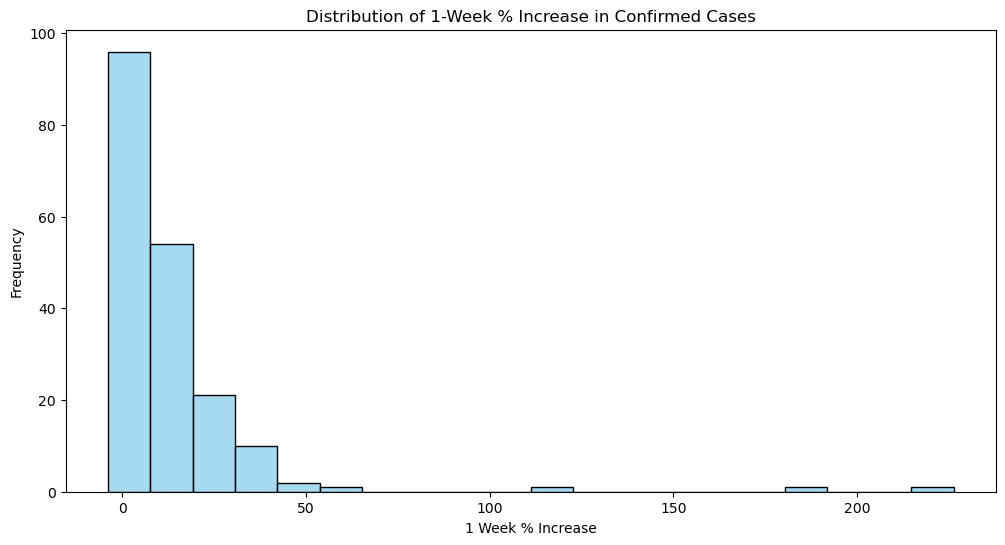

In [131]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='1 week % increase', bins=20, color='skyblue')
plt.title('Distribution of 1-Week % Increase in Confirmed Cases')
plt.xlabel('1 Week % Increase')
plt.ylabel('Frequency')
plt.show()

## Total deaths y WHO Region

C:\Users\BvumaBK\AppData\Local\Temp\ipykernel_11164\2087960685.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_summary, x='Deaths', y='WHO Region', palette='magma')


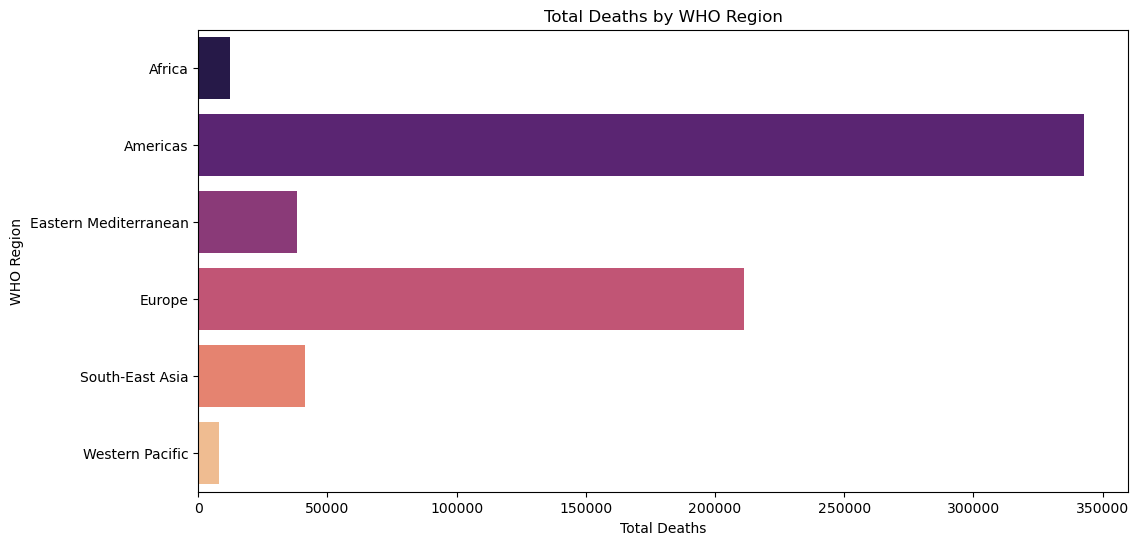

In [133]:
plt.figure(figsize=(12, 6))
sns.barplot(data=region_summary, x='Deaths', y='WHO Region', palette='magma')
plt.title('Total Deaths by WHO Region')
plt.xlabel('Total Deaths')
plt.ylabel('WHO Region')
plt.show()